In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Generate data.
x = []
y = []
i = 0
# Use a while loop to make 100 data. Its iterator i, adds 1 each time our data is correct with the if statement. Correct data means that Y is greater than X**3. The while loop breaks on the 100th data pair.
while i < 100:
    X, Y = np.random.uniform(0, 1, 2)
    if Y > (X**3):
        Y= Y + np.random.normal(0, 0.1, 1) # Make sure to add noise.
        x.append(X)
        y.append(Y)
        i+= 1 # Iterator inside the if statement to add one ONLY when we get correct data.
z = np.column_stack((y,x))
z

array([[ 6.44720989e-01,  9.53424102e-02],
       [ 6.10655333e-01,  1.20929675e-01],
       [ 5.16743564e-01,  6.59358458e-01],
       [ 8.23717938e-01,  5.39779640e-01],
       [ 7.50474168e-01,  6.24892698e-01],
       [ 3.36669730e-01,  4.49397531e-01],
       [-1.19416056e-02,  2.03902940e-01],
       [ 7.66770818e-01,  1.58661351e-01],
       [ 1.09558096e+00,  4.01148249e-01],
       [ 5.43287992e-01,  6.22906949e-02],
       [ 7.44716470e-01,  5.48623609e-01],
       [ 6.53221233e-01,  6.32997320e-01],
       [ 5.63423113e-01,  2.57507895e-01],
       [ 3.78425879e-01,  1.67765421e-01],
       [ 8.99218350e-01,  3.06630015e-01],
       [ 2.33122890e-01,  5.67450912e-01],
       [ 3.74782454e-01,  1.12062945e-01],
       [ 7.53335403e-01,  2.46789102e-01],
       [ 6.85519745e-01,  3.09202924e-01],
       [ 4.47808690e-01,  6.44115561e-01],
       [ 5.56848089e-01,  4.94569516e-01],
       [ 4.92995353e-01,  5.98255198e-01],
       [ 2.41037959e-01,  9.55919443e-02],
       [ 5.

In [8]:
# To find the mean μ, we find μx and μy and we make a 2x1 matrix.
mx = sum(z[:,1])/len(z[:,1])
my = sum(z[:,0])/len(z[:,0])
m = np.stack((my, mx))
m

array([0.60119004, 0.40471377])

In [9]:
# Find Σ as a 2x2 matrix where the right diagonal is the same (σyx), the first point is σy squared and the last point is σx squared.
S = np.dot((m-z).T, m-z)/100
S

array([[0.07826477, 0.02219894],
       [0.02219894, 0.07042112]])

In [10]:
# (c)
a = S[0][1]/(np.sqrt(S[0][0])*np.sqrt(S[1][1])) # Find a=σyx/σx*σy
# Find σx and σy.
sx = np.sqrt(S[1][1])
sy = np.sqrt(S[0][0])

In [11]:
# Find the y estimate using the correct equation which is: μy + α*(σy/σx)*(x - μx).
ye = my + a*(sy/sx)*(z[:,1] - mx)
# Compute the E[y|x] using the computations done in exercise 3.
Eyx = 0.5*(z[:,1])**3 + 0.5

In [12]:
# To find the MSEs.
MSEe = np.mean(pow((ye - z[:,0]), 2))
MSEopt = np.mean(pow((Eyx - z[:,0]), 2))
print(f'The estimate MSE is: {MSEe}\nThe optimal MSE is: {MSEopt}')

The estimate MSE is: 0.07126696858498147
The optimal MSE is: 0.07319222478065321


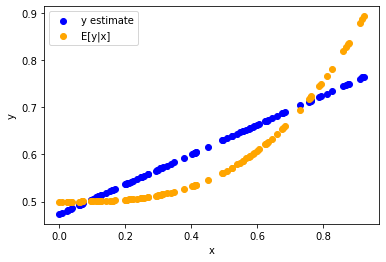

In [13]:
# Plotting the estimators.
plt.scatter(z[:,1], ye, label='y estimate', c='blue')
plt.scatter(z[:,1], Eyx, label='E[y|x]', c='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The plotted lines seem to be correct, however using bigger noise for y the line for MSE estimate the line was plotted entirely wrong when σyx was negative due to the noise. The line depends heavily on the noise given to y.

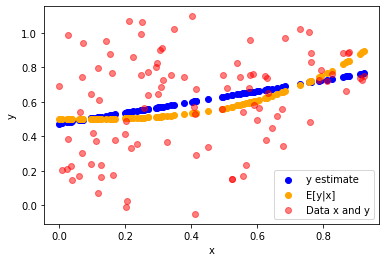

In [14]:
# Plotting the data around the estimators.
plt.scatter(z[:,1], ye, label='y estimate', c='blue')
plt.scatter(z[:,1], Eyx, label='E[y|x]', c='orange')
plt.scatter(z[:,1], z[:,0], label='Data x and y', c='red', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The data are not distributed around their mean. That was expected though since we used the uniform distribution. The data are scattered uniformally as expected. We also observe that the optimal MSE, E[y|x] is not a straight line since its computed using x^3.